Setup definition

In [1]:
Sig = 1
# 0 - Original - Use the original signal
# 1 - STL - Use of filter

# Import Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import os                                                                        
import networkx as nx                                                            
import tensorflow as tf                                                          
from tensorflow import keras 

import random
import pickle as pkl
import keras
from keras.models import Sequential, Model, load_model
from keras.layers import LSTM, Dense, RepeatVector, TimeDistributed, Input, Activation
from keras.layers import BatchNormalization, multiply, concatenate, Flatten, dot

from keras.callbacks import EarlyStopping
import pydot as pyd
from keras.utils.vis_utils import plot_model, model_to_dot
keras.utils.vis_utils.pydot = pyd

# Dataset

Italy Electricity Spot Prices (EUR/MWh)

https://ember-climate.org/data-catalogue/european-wholesale-electricity-price-data/

In [5]:
it = pd.read_csv('original.csv')
x = it.values[:,3]

time = it.values[:,2]
print(time[0])
print(time[len(time)-1])

2015-01-02
2022-11-30


# Seasonal-Trend decomposition

In [6]:
f = pd.Series(x, index=pd.date_range(time[0], periods=len(x), freq="D"), name="DF")

Functions that can be used to perform seasonal-trend decomposition for time series analysis: 

`statsmodels.tsa.seasonal.STL` 

`statsmodels.tsa.seasonal.seasonal_decompose`

## STL

Seasonal-Trend decomposition using LOESS (**STL**) is a method of time series decomposition analyses. The STL uses locally fitted regression models to decompose a time series into trend, seasonal, and remainder components.

*R. B. Cleveland, W. S. Cleveland, J.E. McRae, and I. Terpenning (1990) STL: A Seasonal-Trend Decomposition Procedure Based on LOESS. Journal of Official Statistics, 6, 3-73.*

In [7]:
from statsmodels.tsa.seasonal import STL
stl = STL(f, trend=11, seasonal=7)
res = stl.fit()

x1 = res.observed

# seasonal: Length of the seasonal smoother. Must be an odd integer.
# trend: Length of the trend smoother. Must be an odd integer. 

## SDMA 

Seasonal decomposition using moving averages.

In [8]:
# Seasonal decomposition using moving averages.
# from statsmodels.tsa.seasonal import seasonal_decompose
# res = seasonal_decompose(f, model='multiplicative')

## Plots of the decomposition

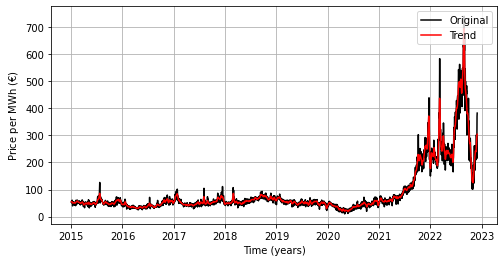

In [36]:
# Original vs Trend

plt.figure(figsize=(8, 4))
plt.plot(res.observed, 'k', res.trend, 'r')
plt.xlabel('Time (years)')
plt.ylabel('Price per MWh ($€$)')
plt.legend(["Original", "Trend"], loc="upper right", bbox_to_anchor=(1, 1), ncol=1)
plt.grid()
plt.savefig('trend.pdf')

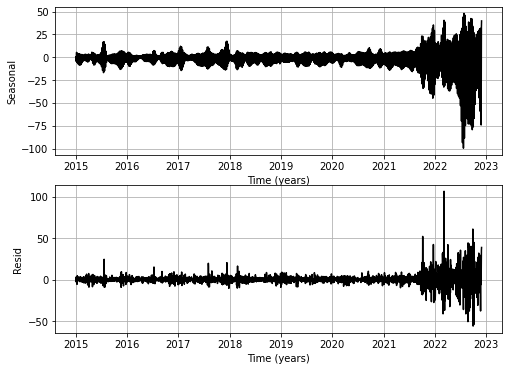

In [38]:
# Seasonal and Resid

plt.figure(figsize=(8, 6))
plt.subplot(211)
plt.plot(res.seasonal, 'k')
plt.xlabel('Time (years)')
plt.ylabel('Seasonal')
plt.grid()
plt.subplot(212)
plt.plot(res.resid, 'k')
plt.xlabel('Time (years)')
plt.ylabel('Resid')
plt.grid()
plt.savefig('RS.pdf')

In [11]:
time[0]

'2015-01-02'

<function matplotlib.pyplot.show(*args, **kw)>

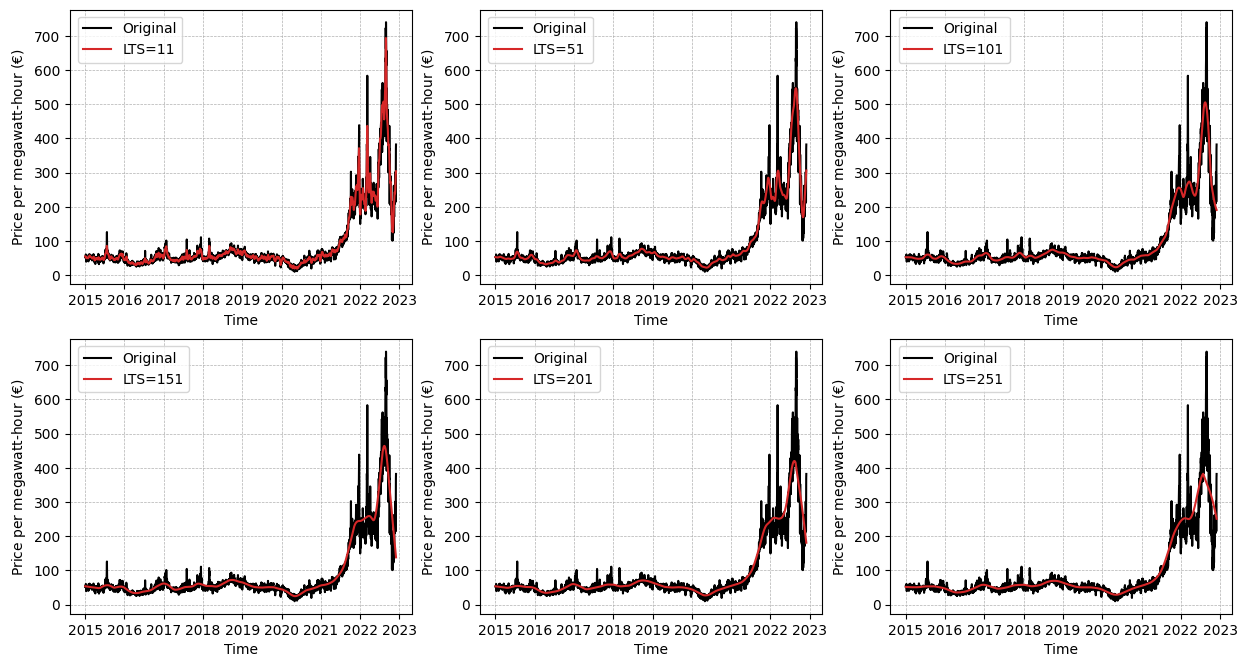

In [12]:
stl1 = STL(f, trend=11, seasonal=7)
x_1 = (stl1.fit()).trend

stl2 = STL(f, trend=51, seasonal=7)
x_2 = (stl2.fit()).trend

stl3 = STL(f, trend=101, seasonal=7)
x_3 = (stl3.fit()).trend

stl4 = STL(f, trend=151, seasonal=7)
x_4 = (stl4.fit()).trend

stl5 = STL(f, trend=201, seasonal=7)
x_5 = (stl5.fit()).trend

stl6 = STL(f, trend=251, seasonal=7)
x_6 = (stl6.fit()).trend

fig, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(2, 3, figsize=(15, 8), dpi=100)

ax1.plot(x1,'k', zorder=2)
ax1.plot(x_1,'tab:red', zorder=2)
ax1.set_ylabel('Price per mMWh ($€$)')
ax1.set_xlabel('Time')
ax1.grid(linestyle = '--', linewidth = 0.5, zorder=0)
ax1.legend(["Original", "LTS=11"], loc="upper right", bbox_to_anchor=(0.35, 1), fancybox=True, shadow=False, ncol=1)
plt.show    

ax2.plot(x1,'k', zorder=2)
ax2.plot(x_2,'tab:red', zorder=2)
ax2.set_ylabel('Price per MWh ($€$)')
ax2.set_xlabel('Time')
ax2.grid(linestyle = '--', linewidth = 0.5, zorder=0)
ax2.legend(["Original", "LTS=51"], loc="upper right", bbox_to_anchor=(0.35, 1), fancybox=True, shadow=False, ncol=1)
plt.show

ax3.plot(x1,'k', zorder=2)
ax3.plot(x_3,'tab:red', zorder=2)
ax3.set_ylabel('Price per MWh ($€$)')
ax3.set_xlabel('Time')
ax3.grid(linestyle = '--', linewidth = 0.5, zorder=0)
ax3.legend(["Original", "LTS=101"], loc="upper right", bbox_to_anchor=(0.37, 1), fancybox=True, shadow=False, ncol=1)
plt.show  

ax4.plot(x1,'k', zorder=2)
ax4.plot(x_4,'tab:red', zorder=2)
ax4.set_ylabel('Price per MWh ($€$)')
ax4.set_xlabel('Time')
ax4.grid(linestyle = '--', linewidth = 0.5, zorder=0)
ax4.legend(["Original", "LTS=151"], loc="upper right", bbox_to_anchor=(0.37, 1), fancybox=True, shadow=False, ncol=1)
plt.show  

ax5.plot(x1,'k', zorder=2)
ax5.plot(x_5,'tab:red', zorder=2)
ax5.set_ylabel('Price per MWh ($€$)')
ax5.set_xlabel('Time')
ax5.grid(linestyle = '--', linewidth = 0.5, zorder=0)
ax5.legend(["Original", "LTS=201"], loc="upper right", bbox_to_anchor=(0.37, 1), fancybox=True, shadow=False, ncol=1)
plt.show  

ax6.plot(x1,'k', zorder=2)
ax6.plot(x_6,'tab:red', zorder=2)
ax6.set_ylabel('Price per MWh ($€$)')
ax6.set_xlabel('Time')
ax6.grid(linestyle = '--', linewidth = 0.5, zorder=0)
ax6.legend(["Original", "LTS=251"], loc="upper right", bbox_to_anchor=(0.37, 1), fancybox=True, shadow=False, ncol=1)
plt.show  
#plt.savefig('trend.pdf')

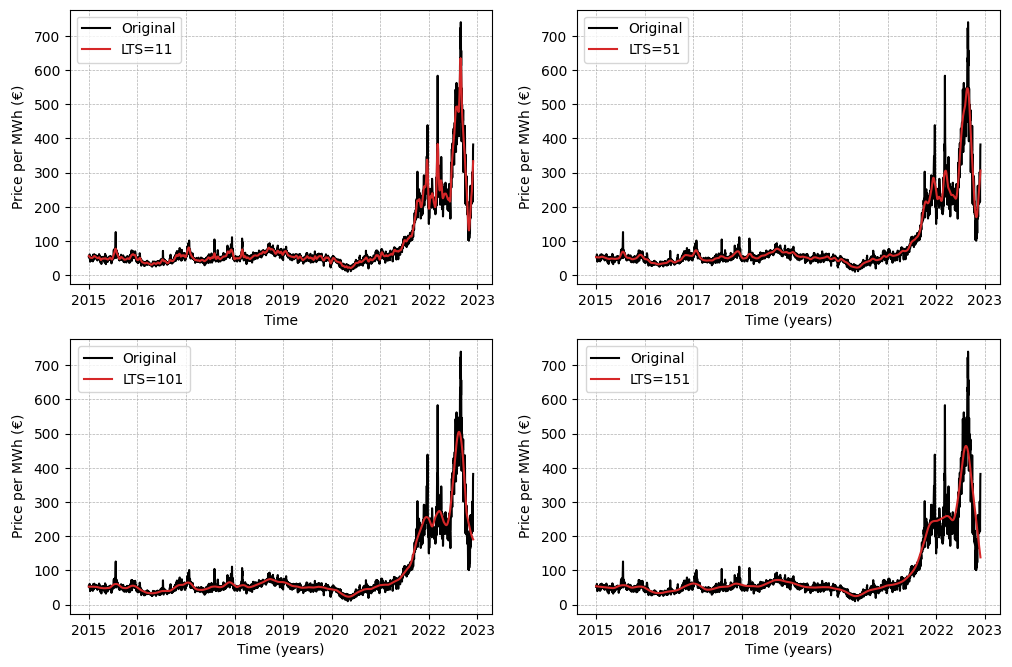

In [39]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(12, 8), dpi=100)

ax1.plot(x1,'k', zorder=2)
ax1.plot(x_1,'tab:red', zorder=2)
ax1.set_ylabel('Price per MWh ($€$)')
ax1.set_xlabel('Time')
ax1.grid(linestyle = '--', linewidth = 0.5, zorder=0)
ax1.legend(["Original", "LTS=11"], loc="upper right", bbox_to_anchor=(0.28, 1), fancybox=True, shadow=False, ncol=1)
plt.show    

ax2.plot(x1,'k', zorder=2)
ax2.plot(x_2,'tab:red', zorder=2)
ax2.set_ylabel('Price per MWh ($€$)')
ax2.set_xlabel('Time (years)')
ax2.grid(linestyle = '--', linewidth = 0.5, zorder=0)
ax2.legend(["Original", "LTS=51"], loc="upper right", bbox_to_anchor=(0.28, 1), fancybox=True, shadow=False, ncol=1)
plt.show

ax3.plot(x1,'k', zorder=2)
ax3.plot(x_3,'tab:red', zorder=2)
ax3.set_ylabel('Price per MWh ($€$)')
ax3.set_xlabel('Time (years)')
ax3.grid(linestyle = '--', linewidth = 0.5, zorder=0)
ax3.legend(["Original", "LTS=101"], loc="upper right", bbox_to_anchor=(0.3, 1), fancybox=True, shadow=False, ncol=1)
plt.show  

ax4.plot(x1,'k', zorder=2)
ax4.plot(x_4,'tab:red', zorder=2)
ax4.set_ylabel('Price per MWh ($€$)')
ax4.set_xlabel('Time (years)')
ax4.grid(linestyle = '--', linewidth = 0.5, zorder=0)
ax4.legend(["Original", "LTS=151"], loc="upper right", bbox_to_anchor=(0.3, 1), fancybox=True, shadow=False, ncol=1)
plt.show 
plt.savefig('trend.pdf') 

# Save data

In [14]:
# Create the variations
stl1 = STL(f, trend=21, seasonal=21)
x_1 = (stl1.fit()).trend

In [15]:
# Export de data

# Original signal
y_orig = [time,x1]
df_orig = np.transpose(y_orig)
pd.DataFrame(df_orig).to_csv("df_orig.csv", index=False)

# STL
y_STL = [time,x_1]
df_STL = np.transpose(y_STL)
pd.DataFrame(df_STL).to_csv("df_STL.csv", index=False)

In [16]:
# Import de data  

# Original signal
if Sig == 0:
  # Import de data  
  df = pd.read_csv('df_orig.csv')

# Decomposition with STL
if Sig == 1:
  df = pd.read_csv('df_STL.csv')

# Facebook’s Prophet

In [18]:
!pip install localpip --quiet
!pip install pystan~=2.14 --quiet
!pip install fbprophet --quiet
from fbprophet import Prophet

     |████████████████████████████████| 2.5 MB 25.5 MB/s 
     |████████████████████████████████| 93 kB 2.7 MB/s 
     |████████████████████████████████| 62.6 MB 1.2 MB/s 
     |████████████████████████████████| 64 kB 2.6 MB/s 
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
prophet 1.1.1 requires cmdstanpy>=1.0.4, but you have cmdstanpy 0.9.5 which is incompatible.


In [19]:
df.columns = ['ds', 'y']
df['ds'] = pd.to_datetime(df['ds'])

In [20]:
# defining the number of observations we want to predict
nobs = 50
train = df[:-nobs]
test = df[-nobs:]

In [21]:
print(f"Length of dataframe: {len(df)}\n"
      f"Length of train set: {len(train)}\n"
      f"Length of test set: {len(test)}")

Length of dataframe: 2890
Length of train set: 2840
Length of test set: 50


In [22]:
# Creating an instance of the Prophet model
prophet = Prophet()
# fitting Prophet model to the train set
prophet.fit(train)

future = prophet.make_future_dataframe(periods=nobs, freq="D", include_history = True)
forecast = prophet.predict(future)

y_pred = forecast.iloc[-nobs:]['yhat']
y_true = test['y']

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Evaluation

In [23]:
from statsmodels.tools.eval_measures import mse
print(mse(y_true, y_pred))

61336.33540892807


In [24]:
from statsmodels.tools.eval_measures import rmse
print(rmse(y_true, y_pred))

247.6617358594744


In [25]:
mape = np.mean(np.abs((y_true - y_pred)/y_true))*100 # %
print(mape)

132.61568454472993


# Extra evaluation

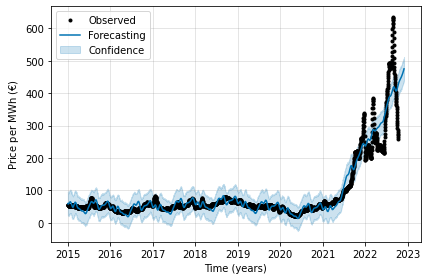

In [40]:
fig1 = prophet.plot(forecast, figsize=(6, 4))
plt.legend(["Observed", "Forecasting", "Confidence"])
plt.ylabel('Price per MWh ($€$)')
plt.xlabel('Time (years)')
plt.savefig('facebook.pdf') 

In [27]:
forecast[['ds','yhat','yhat_lower','yhat_upper']]

,ds,yhat,yhat_lower,yhat_upper
0,2015-01-02,59.129911,24.359800,96.533269
1,2015-01-03,58.516941,23.160629,92.290867
2,2015-01-04,58.051459,23.005582,93.247626
3,2015-01-05,57.734623,22.517476,89.077720
4,2015-01-06,57.563463,21.919741,94.931252
...,...,...,...,...
2885,2022-11-26,469.804069,434.137774,505.317718
2886,2022-11-27,471.020281,436.676364,504.826591
2887,2022-11-28,472.245672,436.020777,507.409104
2888,2022-11-29,473.472478,439.876171,507.035472


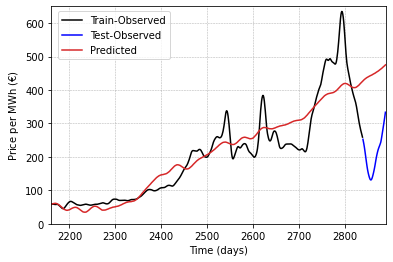

In [41]:
plt.figure(figsize=(6,4))
plt.plot(train['y'],'k', zorder=2)
plt.plot(y_true,'b', zorder=2)
plt.plot(forecast['yhat'],'tab:red', zorder=2)
plt.xlabel('Time (days)')
plt.ylabel('Price per MWh ($€$)')
plt.legend(["Train-Observed", "Test-Observed", "Predicted"], loc="upper right", bbox_to_anchor=(0.37, 1), fancybox=True, shadow=False, ncol=1)
plt.grid(linestyle = '--', linewidth = 0.5, zorder=0)
plt.axis([(len(forecast['yhat'])-730), len(forecast['yhat']), 0, 650])
plt.show  
plt.savefig('facebook_r.pdf') 

In [29]:
print('Statistical tables for the test base and validation base')
print(" "*254)
display(test['y'].describe())
print(" "*254)
display(forecast['yhat'].describe())

Statistical tables for the test base and validation base
                                                                                                                                                                                                                                                              


count     50.000000
mean     207.325324
std       56.745261
min      130.982274
25%      156.031477
50%      206.822372
75%      243.503679
max      333.585930
Name: y, dtype: float64

count    2890.000000
mean       93.396683
std       101.163923
min        12.983067
25%        43.371536
50%        55.130180
75%        68.774399
max       475.126455
Name: yhat, dtype: float64

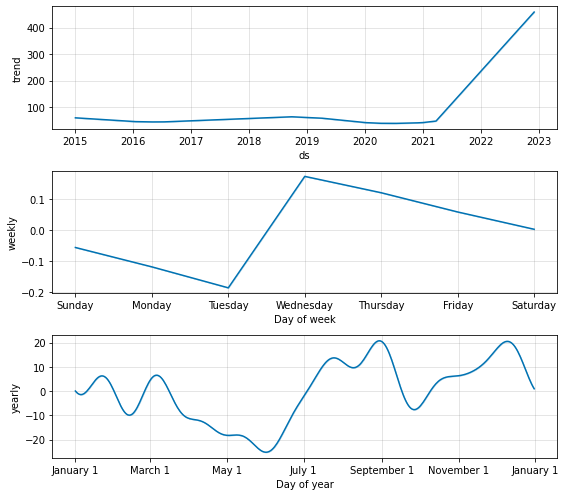

In [42]:
prophet.plot_components(forecast, figsize=(8,7))
plt.savefig('comp.pdf') 